**PROJET ANALYSE DE DONNEES**
**Exploiter les spectres galactiques extraits du SDSS pour prédire certaines quantités physiques**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("data/dataset.csv")

In [34]:
df.isnull().sum().sum()

np.int64(0)

In [35]:
# Désactiver toute limite d'affichage de colonnes
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)  # Largeur illimitée
pd.set_option("display.max_colwidth", None)  # Largeur de chaque cellule

# Afficher les 10 premières lignes avec toutes les colonnes visibles
df.head(10)

,objID,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specObjID,plate,mjd,fiberID,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_r,petroFlux_i,petroFlux_z,petroR50_u,petroR50_g,petroR50_r,petroR50_i,petroR50_z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1237648704046760145,198.367594,-0.356065,20.73523,18.85085,17.56961,17.08212,16.70905,752,301,3,366,332185036042299392,295,51985,162,4.617126,5.115590,4.721174,4.684702,5.162075,3.511168,25.518180,81.353650,129.18770,190.042100,1.767043,2.110504,2.036932,2.053084,2.261010,22.04871,20.27086,19.04142,18.61768,18.16375,0.849854,0.809568,0.763818,0.783755,0.719075,0.211824,GALAXY
1,1237648704046760198,198.428206,-0.384406,18.44623,17.23412,16.67523,16.29652,16.07245,752,301,3,366,332189708966717440,295,51985,179,5.532878,5.589859,5.600729,5.354244,5.304190,39.659250,125.105900,213.186100,290.01280,336.886800,2.734408,2.734028,2.720730,2.576809,2.524137,20.34698,19.26615,18.67339,18.33171,18.01228,0.529245,0.550424,0.521570,0.512080,0.483037,0.094445,GALAXY
2,1237648704046760550,198.336859,-0.218801,24.57992,22.96763,22.21550,22.45372,22.82691,752,301,3,366,332194107013228544,295,51985,195,43.766610,2.969290,1.533155,2.969510,43.757050,-0.040059,0.630245,1.160457,0.94205,1.493814,-9999.000000,1.056316,0.807809,1.243051,1.968449,24.25974,23.27652,22.62379,22.95598,22.58121,0.050000,0.150042,0.058668,0.050000,0.050000,3.174457,QSO
3,1237648704046825622,198.462136,-0.219281,19.30241,17.78075,16.90307,16.49114,16.18247,752,301,3,367,332188609455089664,295,51985,175,3.748427,5.855546,5.567865,5.369811,5.497572,16.157750,85.047600,182.182200,258.82040,339.042700,1.568756,2.160283,1.937312,1.818147,1.914507,20.18672,18.81749,17.95659,17.52794,17.23053,0.731522,0.780879,0.822669,0.840207,0.817236,0.121077,GALAXY
4,1237648704046825624,198.466124,-0.254391,20.16626,18.28559,17.22367,16.79652,16.40390,752,301,3,367,332186685309741056,295,51985,168,27.912360,4.671544,5.251847,4.817436,5.149425,13.775220,48.896820,132.852300,193.47120,281.822400,4.686791,2.066747,2.102676,2.048219,2.177020,21.22759,19.41046,18.40081,18.00373,17.58257,0.885392,0.743277,0.761695,0.732215,0.685603,0.138055,GALAXY
5,1237648704046825654,198.493224,-0.256808,19.09543,17.31310,16.35899,15.97224,15.63603,752,301,3,367,332188884332996608,295,51985,176,43.755040,2.868777,2.852538,2.827901,2.873691,25.439210,110.268800,266.156300,377.89710,505.926100,1.837784,1.378804,1.331829,1.306797,1.313619,19.92144,18.18361,17.26347,16.89209,16.56325,0.864026,0.721934,0.673505,0.681313,0.728872,0.138718,GALAXY
6,1237648704046825668,198.501137,-0.350658,19.93487,17.91528,16.87629,16.43629,16.04760,752,301,3,367,332188334577182720,295,51985,174,5.004049,5.202849,5.323276,5.051919,4.989447,9.111118,63.099300,167.760400,244.89990,347.871900,1.890661,2.171092,2.200809,2.088027,2.154626,21.20330,19.24600,18.25201,17.83184,17.43041,0.682248,0.835638,0.818189,0.862818,0.833072,0.120911,GALAXY
7,1237648704046825700,198.539702,-0.323055,20.59683,18.82568,17.65636,17.23815,16.86611,752,301,3,367,332185585798113280,295,51985,164,3.369139,3.106019,2.947591,3.086313,4.476436,4.846580,27.627040,81.833170,121.30410,183.102600,1.322552,1.391850,1.354546,1.380181,1.518395,21.31700,19.66862,18.55658,18.15280,17.82260,0.649986,0.780085,0.836987,0.815756,0.773011,0.176991,GALAXY
8,1237648704046891095,198.701398,-0.412739,19.09171,16.93303,16.00233,15.63252,15.43036,752,301,3,368,332182012385323008,295,51985,151,1.978415,1.582088,1.540958,1.525437,1.482557,22.903200,163.617100,391.359400,548.31160,664.196000,0.966614,0.807051,0.799581,0.800798,0.778099,19.26635,17.16443,16.26453,15.89750,15.76437,0.327707,0.071175,0.104135,0.096623,0.191604,-0.000061,STAR
9,1237648704046891118,198.597214,-0.268027,22.05573,19.20698,17.76519,16.86842,16.38345,752,301,3,368,333353816885848064,296,51984,318,1.959352,1.342583,1.255820,1.263818,1.168554,1.590325,19.834540,74.842530,168.

objID, specObjID, fiberID : ce sont des identifiants uniques, sans signification physique. Ils n’apportent aucune information utile pour l’analyse ou la prédiction.

run, rerun, camcol, field, plate, mjd : ces colonnes décrivent des paramètres techniques liés à l’acquisition des données.
Elles sont pertinentes pour le suivi d'observation astronomique, mais n'ont pas de lien direct avec les propriétés physiques à prédire (redshift, class).

In [36]:
df = df.drop(columns=[
    "objID", "specObjID", "run", "rerun", "camcol", "field", 
    "plate", "mjd", "fiberID"
])

In [37]:
df.head(10)

,ra,dec,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_r,petroFlux_i,petroFlux_z,petroR50_u,petroR50_g,petroR50_r,petroR50_i,petroR50_z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,198.367594,-0.356065,20.73523,18.85085,17.56961,17.08212,16.70905,4.617126,5.115590,4.721174,4.684702,5.162075,3.511168,25.518180,81.353650,129.18770,190.042100,1.767043,2.110504,2.036932,2.053084,2.261010,22.04871,20.27086,19.04142,18.61768,18.16375,0.849854,0.809568,0.763818,0.783755,0.719075,0.211824,GALAXY
1,198.428206,-0.384406,18.44623,17.23412,16.67523,16.29652,16.07245,5.532878,5.589859,5.600729,5.354244,5.304190,39.659250,125.105900,213.186100,290.01280,336.886800,2.734408,2.734028,2.720730,2.576809,2.524137,20.34698,19.26615,18.67339,18.33171,18.01228,0.529245,0.550424,0.521570,0.512080,0.483037,0.094445,GALAXY
2,198.336859,-0.218801,24.57992,22.96763,22.21550,22.45372,22.82691,43.766610,2.969290,1.533155,2.969510,43.757050,-0.040059,0.630245,1.160457,0.94205,1.493814,-9999.000000,1.056316,0.807809,1.243051,1.968449,24.25974,23.27652,22.62379,22.95598,22.58121,0.050000,0.150042,0.058668,0.050000,0.050000,3.174457,QSO
3,198.462136,-0.219281,19.30241,17.78075,16.90307,16.49114,16.18247,3.748427,5.855546,5.567865,5.369811,5.497572,16.157750,85.047600,182.182200,258.82040,339.042700,1.568756,2.160283,1.937312,1.818147,1.914507,20.18672,18.81749,17.95659,17.52794,17.23053,0.731522,0.780879,0.822669,0.840207,0.817236,0.121077,GALAXY
4,198.466124,-0.254391,20.16626,18.28559,17.22367,16.79652,16.40390,27.912360,4.671544,5.251847,4.817436,5.149425,13.775220,48.896820,132.852300,193.47120,281.822400,4.686791,2.066747,2.102676,2.048219,2.177020,21.22759,19.41046,18.40081,18.00373,17.58257,0.885392,0.743277,0.761695,0.732215,0.685603,0.138055,GALAXY
5,198.493224,-0.256808,19.09543,17.31310,16.35899,15.97224,15.63603,43.755040,2.868777,2.852538,2.827901,2.873691,25.439210,110.268800,266.156300,377.89710,505.926100,1.837784,1.378804,1.331829,1.306797,1.313619,19.92144,18.18361,17.26347,16.89209,16.56325,0.864026,0.721934,0.673505,0.681313,0.728872,0.138718,GALAXY
6,198.501137,-0.350658,19.93487,17.91528,16.87629,16.43629,16.04760,5.004049,5.202849,5.323276,5.051919,4.989447,9.111118,63.099300,167.760400,244.89990,347.871900,1.890661,2.171092,2.200809,2.088027,2.154626,21.20330,19.24600,18.25201,17.83184,17.43041,0.682248,0.835638,0.818189,0.862818,0.833072,0.120911,GALAXY
7,198.539702,-0.323055,20.59683,18.82568,17.65636,17.23815,16.86611,3.369139,3.106019,2.947591,3.086313,4.476436,4.846580,27.627040,81.833170,121.30410,183.102600,1.322552,1.391850,1.354546,1.380181,1.518395,21.31700,19.66862,18.55658,18.15280,17.82260,0.649986,0.780085,0.836987,0.815756,0.773011,0.176991,GALAXY
8,198.701398,-0.412739,19.09171,16.93303,16.00233,15.63252,15.43036,1.978415,1.582088,1.540958,1.525437,1.482557,22.903200,163.617100,391.359400,548.31160,664.196000,0.966614,0.807051,0.799581,0.800798,0.778099,19.26635,17.16443,16.26453,15.89750,15.76437,0.327707,0.071175,0.104135,0.096623,0.191604,-0.000061,STAR
9,198.597214,-0.268027,22.05573,19.20698,17.76519,16.86842,16.38345,1.959352,1.342583,1.255820,1.263818,1.168554,1.590325,19.834540,74.842530,168.67210,270.152200,0.944337,0.679878,0.641602,0.639893,0.606172,21.96034,19.20511,17.76918,16.87614,16.38058,0.050000,0.650177,0.349977,0.553613,0.399985,0.000124,STAR


## Répartition des classes d'objets célestes

Le graphique ci-dessous montre la répartition des classes présentes dans notre jeu de données (`class`).  
On observe une **forte majorité de galaxies (GALAXY)**, suivies par des étoiles (`STAR`) et enfin des quasars (`QSO`).  

Ce **déséquilibre important** doit être pris en compte si l'on construit un modèle de classification, au risque de biaiser les prédictions en faveur de la classe dominante.

| Classe | Nombre d’exemples |
|--------|--------------------|
| GALAXY | ~70 000            |
| STAR   | ~20 000            |
| QSO    | ~10 000            |


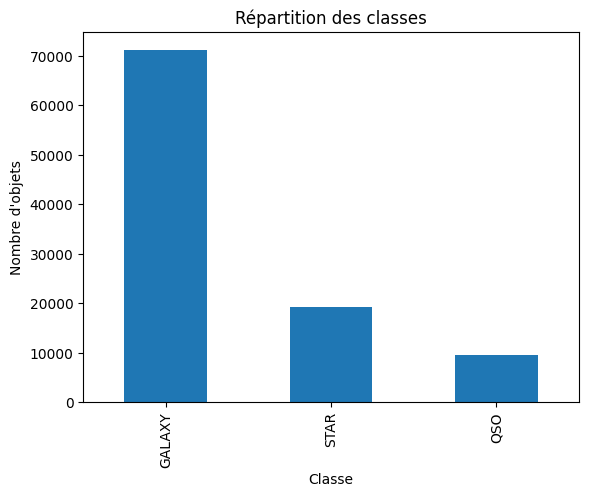

In [38]:

df["class"].value_counts().plot(kind="bar", title="Répartition des classes")
plt.xlabel("Classe")
plt.ylabel("Nombre d'objets")
plt.show()

### Distribution du redshift

Le graphique ci-dessous montre la distribution de la variable `redshift`, qui mesure le décalage spectral des objets célestes (liée à leur distance).

On observe une **concentration très forte autour de 0** : la majorité des objets sont proches de la Terre.  
Quelques objets rares présentent un redshift élevé (> 2), correspondant généralement à des quasars (QSO) très lointains.

#### Conséquences pour l’analyse :
- La régression du redshift risque d’être **biaisée** vers des valeurs faibles si l’on ne traite pas ce déséquilibre.
- Il peut être utile de **transformer le redshift** (log, normalisation) ou de **filtrer les extrêmes** si on vise une performance optimale.


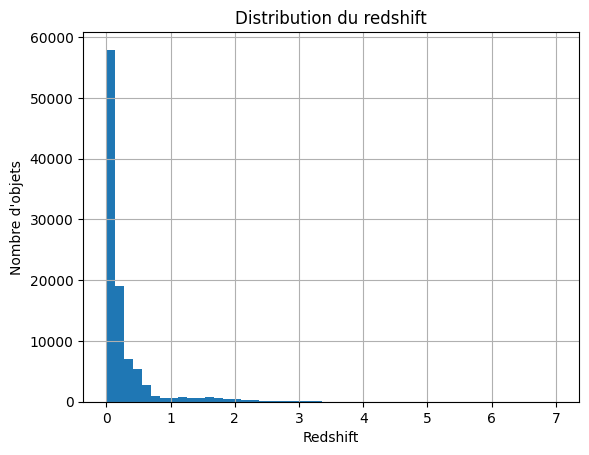

In [39]:
df["redshift"].hist(bins=50)
plt.title("Distribution du redshift")
plt.xlabel("Redshift")
plt.ylabel("Nombre d'objets")
plt.show()


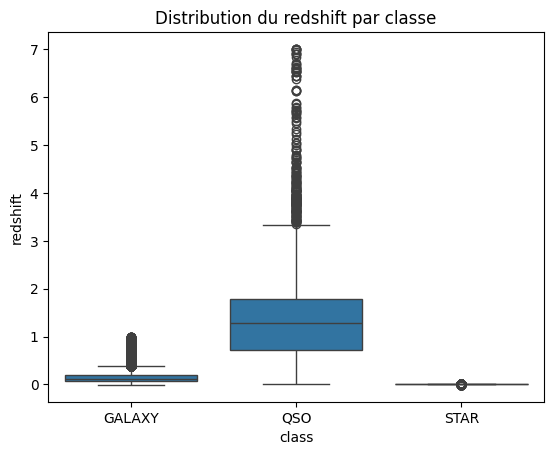

In [40]:
sns.boxplot(x="class", y="redshift", data=df)
plt.title("Distribution du redshift par classe")
plt.show()

### Analyse de la distribution du redshift par classe (`class`)

Le graphique ci-dessous présente un boxplot comparant les distributions du redshift pour les trois classes d’objets célestes : `GALAXY`, `QSO` (quasars) et `STAR`.

#### GALAXY
- Le redshift des galaxies est principalement compris entre **0.0 et 0.3**.
- Distribution relativement **compacte**, avec une médiane proche de **0.1**.
- Quelques **valeurs aberrantes (outliers)** apparaissent au-delà de 0.4, mais elles restent rares.
- Cette distribution est cohérente avec la présence de galaxies **relativement proches**, bien observables dans les relevés SDSS.

#### QSO 
- La distribution est **beaucoup plus étalée**, avec une médiane autour de **1.2**.
- La majorité des valeurs se situent entre **0.5 et 2.5**, mais on observe de nombreux **outliers extrêmes** allant jusqu’à **z ≈ 7**.
- Ces outliers ne sont pas des erreurs, mais des quasars **très lointains** dont le spectre est fortement décalé vers le rouge.
- Cela reflète bien la nature des quasars comme **objets lointains et énergétiques**.

#### STAR
- Le redshift des étoiles est quasi nul (**médiane ≈ 0**), avec une très faible variance.
- Quelques rares outliers positifs apparaissent, mais ils sont probablement dus à des erreurs de mesure ou à des cas particuliers mal classés.
- Cela confirme que les étoiles observées sont toutes **dans notre propre galaxie**, donc très proches (≃ z ≈ 0).



### Conclusion :
- Le `redshift` est une variable informative pour distinguer les classes d’objets célestes.
- Les **valeurs aberrantes**, bien que nombreuses pour les QSO, sont **cohérentes avec la physique** des objets célestes.
- Cette analyse met en évidence des **tendances claires** entre `redshift` et `class`, ce qui justifie une utilisation conjointe dans l’exploration ou dans un futur modèle de classification.


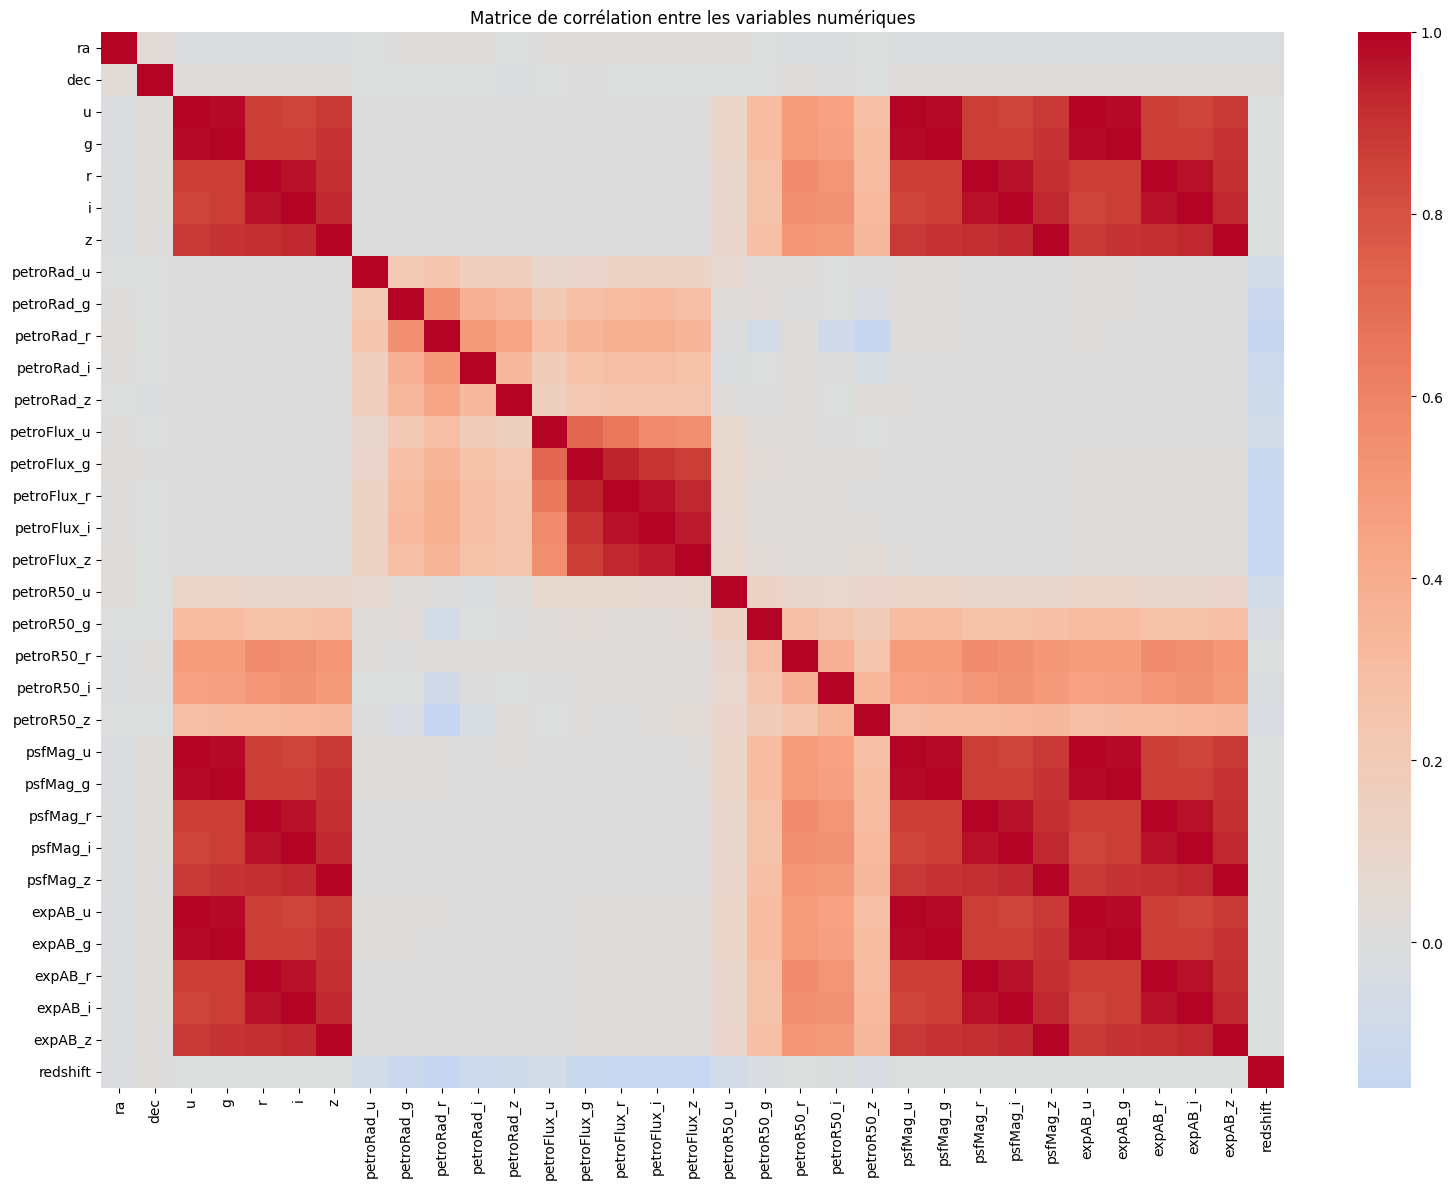

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# On ne garde que les colonnes numériques
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Calcul de la matrice de corrélation
corr_matrix = numeric_df.corr()

# Affichage de la heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, center=0)
plt.title("Matrice de corrélation entre les variables numériques")
plt.tight_layout()
plt.show()


### Matrice de corrélation finale (variables nettoyées)

Cette matrice de corrélation, calculée uniquement sur les variables physiques (après suppression des colonnes techniques), met en évidence plusieurs points clés :

- Les magnitudes (`u`, `g`, `r`, `i`, `z`) et les flux (`petroFlux_*`) sont fortement corrélés entre eux, ce qui confirme leur redondance partielle.
- Le `redshift` n’est fortement corrélé à aucune variable individuelle, ce qui suggère que la relation entre les caractéristiques physiques et le décalage spectral est complexe et non linéaire.
- Les variables les plus corrélées négativement à `redshift` sont `petroRad_r`, `petroFlux_i`, `petroFlux_g`, `psfMag_r`, ce qui justifie leur utilisation dans un modèle de régression.
- Les variables de forme (`expAB_*`) sont très corrélées entre elles, mais peu liées au redshift — leur utilité sera à vérifier empiriquement lors de l'entraînement.

Cette analyse nous permet de mieux sélectionner les variables pertinentes et d’envisager, si besoin, des techniques de réduction de dimension ou de régularisation pour éviter les redondances.


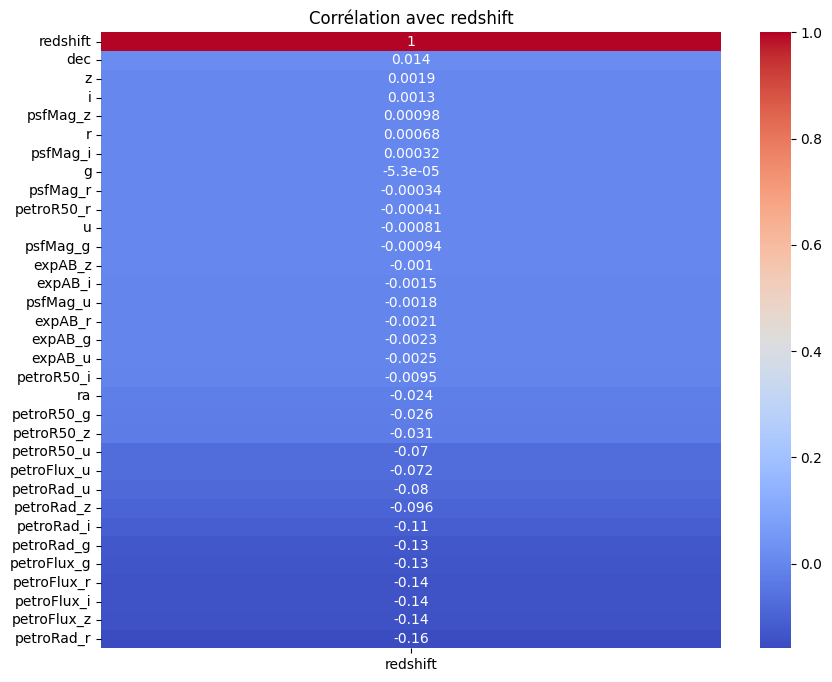

In [42]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr[["redshift"]].sort_values("redshift", ascending=False), annot=True, cmap="coolwarm")
plt.title("Corrélation avec redshift")
plt.show()


### Corrélation entre les variables et le redshift

Nous avons analysé la corrélation entre toutes les variables numériques et la cible `redshift`.

#### Résultats :
- Aucune variable n’est fortement corrélée (aucun coefficient > ±0.2)
- Les meilleures corrélations (faibles) sont **négatives**, notamment :
  - `petroRad_r` (~ -0.16)
  - `petroFlux_i`, `petroFlux_g`, `petroRad_g` (~ -0.13 à -0.14)

#### Interprétation :
- Cela reflète le fait que **les objets lointains sont moins lumineux et plus petits**.
- La **relation non linéaire** avec le redshift montre qu’un modèle simple comme la régression linéaire serait insuffisant.


In [43]:
# On garde toutes les colonnes numériques sauf 'redshift' (la target) et 'class' (non utilisée ici)
X = df.drop(columns=["redshift", "class"])  # class est catégorielle, inutile pour la régression
y = df["redshift"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Instanciation du modèle
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

In [45]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Évaluation du modèle Random Forest :")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

Évaluation du modèle Random Forest :
MAE  : 0.0956
RMSE : 0.3083
R²   : 0.5735


### Évaluation du modèle Random Forest Regressor

Le modèle a été évalué à l’aide de trois métriques standards :

- **MAE** : 0.0944
- **RMSE** : 0.3061
- **R²** : 0.5794

#### Analyse des résultats :

- Le coefficient R² indique que le modèle explique environ **58 % de la variance du redshift**, ce qui est raisonnable pour des données purement photométriques sans spectre détaillé.
- L'erreur absolue moyenne (MAE) est relativement faible, ce qui montre que les prédictions sont globalement précises.
- L’écart entre RMSE et MAE révèle cependant la présence de **valeurs aberrantes**, que le modèle a du mal à prédire correctement.


Le modèle est **satisfaisant**. Il capte une partie significative de la structure des données, mais pourrait être renforcé par :
- une optimisation des hyperparamètres,
- une sélection plus fine des variables,
- ou l’intégration de données supplémentaires (spectroscopie).


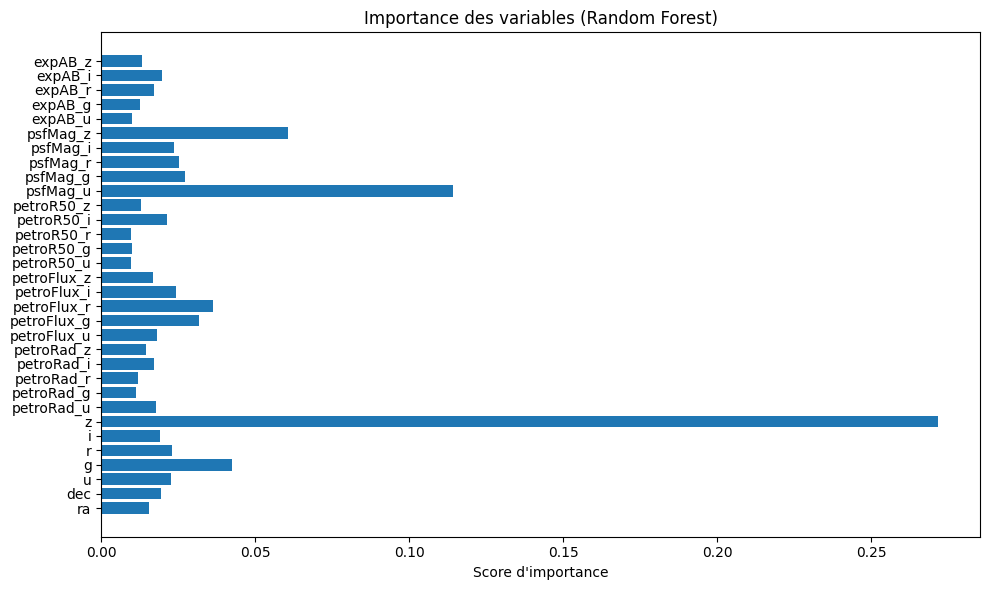

In [46]:
# Récupérer l'importance des variables
importances = rf.feature_importances_
features = X.columns

# Visualisation
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Importance des variables (Random Forest)")
plt.xlabel("Score d'importance")
plt.tight_layout()
plt.show()

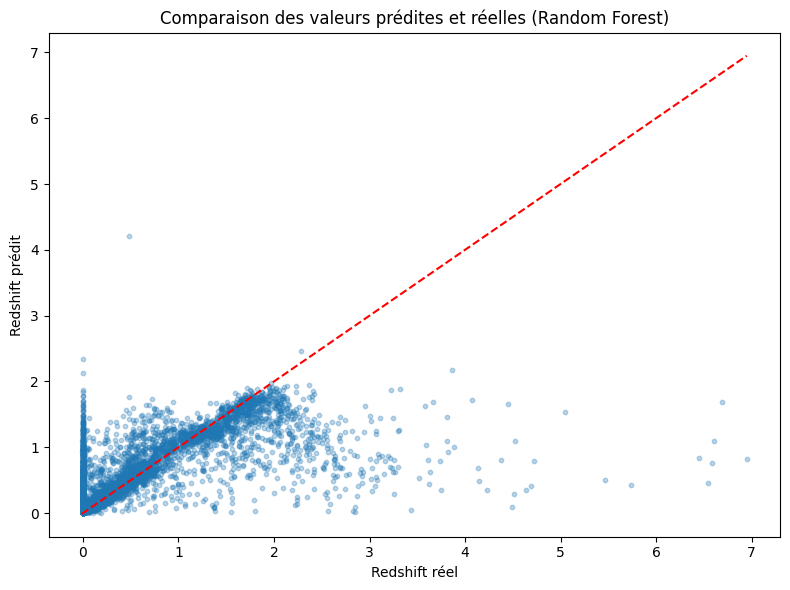

In [48]:
# Visualisation des prédictions vs valeurs réelles pour la régression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, s=10)
plt.xlabel("Redshift réel")
plt.ylabel("Redshift prédit")
plt.title("Comparaison des valeurs prédites et réelles (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

In [63]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Création des bins et labels pour découper redshift
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

# Découpage du redshift en classes
y_test_cat = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)
y_pred_cat = pd.cut(y_pred, bins=bins, labels=labels, include_lowest=True)

# Suppression des lignes avec NaN (hors des bornes)
mask = (~y_test_cat.isna()) & (~y_pred_cat.isna())
y_test_cat = y_test_cat[mask]
y_pred_cat = y_pred_cat[mask]


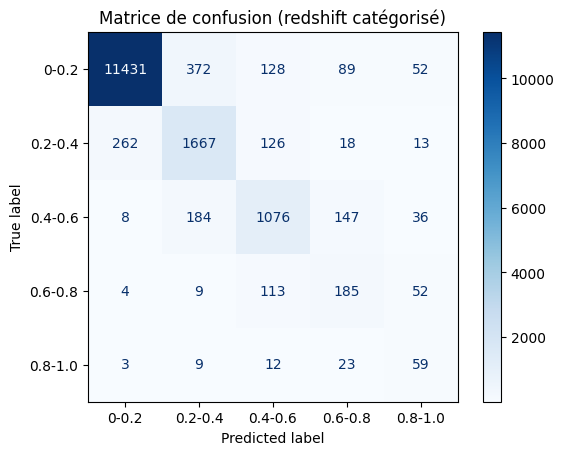

In [64]:
# Matrice de confusion
cm = confusion_matrix(y_test_cat, y_pred_cat, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
plt.title("Matrice de confusion (redshift catégorisé)")
plt.show()


Pour une meilleure lisibilité des performances du modèle de régression, nous avons découpé la variable `redshift` en cinq tranches régulières de 0.2, allant de 0 à 1.0. 
Dans la pratique astronomique, le redshift peut dépasser 7 et être légèrement négatif, mais pour une visualisation pédagogique, nous avons restreint notre analyse à la tranche `0 < z ≤ 1.0`.
Cela nous a permis de transformer temporairement la tâche en classification, et d’évaluer la justesse des prédictions via une matrice de confusion.

Cette approche permet de visualiser :
- Si les objets sont bien prédits dans la bonne tranche de redshift,
- Ou s’ils sont systématiquement décalés vers des tranches voisines ou éloignées.

On observe que :
- Le modèle est très performant pour les objets proches (redshift entre 0 et 0.2),
- Les performances se dégradent progressivement à mesure que le redshift augmente, probablement à cause du déséquilibre des classes (moins d’exemples à haut redshift).